In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
adult = pd.read_csv(r"C:\Users\ammanana\Downloads/adult_machine_learning.csv")

In [3]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


In [4]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43580 entries, 0 to 43579
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43580 non-null  int64 
 1   workclass        43580 non-null  object
 2   fnlwgt           43580 non-null  int64 
 3   education        43580 non-null  object
 4   educational-num  43580 non-null  int64 
 5   marital-status   43580 non-null  object
 6   occupation       43580 non-null  object
 7   relationship     43580 non-null  object
 8   race             43580 non-null  object
 9   gender           43580 non-null  object
 10  hours-per-week   43580 non-null  int64 
 11  native-country   43580 non-null  object
 12  income           43580 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.3+ MB


In [5]:
adult.shape

(43580, 13)

In [6]:
adult = adult.drop(['hours-per-week'],axis=1)

In [7]:
adult['income'].value_counts()

<=50K    32717
>50K     10863
Name: income, dtype: int64

In [8]:
adult['income'] = adult['income'].apply(lambda x:x.replace('<=50K',"0"))
adult['income'] = adult['income'].apply(lambda x:x.replace('>50K',"1"))
adult['income'] = adult['income'].astype('int64')

In [9]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,1
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,United-States,0


### STEP 1 : Identify the Target Variable and Splitting the Data into Train and Test

In [10]:
y = adult[['income']]
X = adult[['age','workclass','fnlwgt','education','educational-num','marital-status','occupation','relationship','race','gender','native-country']]

In [11]:
# split into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [12]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape) 

(32685, 11) (32685, 1)
(10895, 11) (10895, 1)


### STEP 2: Separating Categorical and Numerical Columns

In [13]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
13630,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
37339,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
10344,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
2507,Federal-gov,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,Germany
38396,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Male,Ireland


In [14]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,age,fnlwgt,educational-num
13630,31,140092,13
37339,36,224886,13
10344,43,107503,13
2507,35,112008,10
38396,30,196342,14


In [15]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',sparse=False)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
13630,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
37339,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10344,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38396,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,age,fnlwgt,educational-num
13630,-0.315789,-0.316363,0.75
37339,-0.052632,0.429748,0.75
10344,0.315789,-0.603117,0.75
2507,-0.105263,-0.563477,0.00
38396,-0.368421,0.178587,1.00


In [17]:
X_train_transformed = pd.concat([X_train_num_rescaled,X_train_cat_ohe], axis=1)

X_train_transformed.head()

,age,fnlwgt,educational-num,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
13630,-0.315789,-0.316363,0.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
37339,-0.052632,0.429748,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10344,0.315789,-0.603117,0.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2507,-0.105263,-0.563477,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38396,-0.368421,0.178587,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Preparing Test Data

In [18]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
31784,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
39875,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
14526,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
25570,Private,HS-grad,Never-married,Craft-repair,Own-child,White,Female,United-States
11238,Private,Bachelors,Divorced,Sales,Not-in-family,White,Male,United-States


In [19]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,age,fnlwgt,educational-num
31784,33,58582,9
39875,39,150057,10
14526,42,159449,13
25570,22,264874,9
11238,30,213226,13


In [20]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
31784,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14526,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25570,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11238,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
scaler = RobustScaler()
X_test_num_rescaled = pd.DataFrame(scaler.fit_transform(X_test_num), 
                                    columns = X_test_num.columns, 
                                    index = X_test_num.index)

X_test_num_rescaled.head()

,age,fnlwgt,educational-num
31784,-0.210526,-1.016142,-0.25
39875,0.105263,-0.223540,0.00
14526,0.263158,-0.142161,0.75
25570,-0.789474,0.771313,-0.25
11238,-0.368421,0.323799,0.75


In [22]:
X_test_transformed = pd.concat([X_test_num_rescaled,X_test_cat_ohe], axis=1)

X_test_transformed.head()

,age,fnlwgt,educational-num,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
31784,-0.210526,-1.016142,-0.25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39875,0.105263,-0.223540,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14526,0.263158,-0.142161,0.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25570,-0.789474,0.771313,-0.25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11238,-0.368421,0.323799,0.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_transformed)
log_reg = sm.Logit(y_train,X_train_sm).fit()

         Current function value: 0.361967
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
log_reg.params

const                            -3.082404
age                               0.511571
fnlwgt                            0.118238
educational-num                   1.239862
workclass_Local-gov              -0.583669
                                    ...   
native-country_Thailand          -1.096561
native-country_Trinadad&Tobago   -2.260282
native-country_United-States     -0.318849
native-country_Vietnam           -1.200015
native-country_Yugoslavia         0.166496
Length: 94, dtype: float64

In [25]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                32685
Model:                          Logit   Df Residuals:                    32592
Method:                           MLE   Df Model:                           92
Date:                Mon, 22 Aug 2022   Pseudo R-squ.:                  0.3585
Time:                        19:53:57   Log-Likelihood:                -11831.
converged:                      False   LL-Null:                       -18442.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -3.0824   6.41e+06  -4.81e-07      1.000   -1.26e+07    1.26e+07
age                                           0.5116      0.030     17.181      0.000       0.453       0.570
fnlwgt                                        0.1182      0.021      5.508      0.000       0.076       0.160
educational-num                               1.2399   6.41e+06   1.93e-07      1.000   -1.26e+07    1.26e+07
workclass_Local-gov                          -0.5837      0.104     -5.637      0.000      -0.787      -0.381
workclass_Private                            -0.4186      0.086     -4.846      0.000      -0.588      -0.249
workclass_Self-emp-inc                       -0.1328      0.112     -1.181      0.238      -0.353       0.088
workclass_Self-emp-not-inc                   -0.8994      0.101     -8.910      0.000      -1.097      -0.702
workclass_State-gov                          -0.8380      0.114     -7.355      0.000      -1.061      -0.615
workclass_Without-pay                        -1.6463      0.797     -2.067      0.039      -3.208      -0.085
education_11th                               -0.1396    1.6e+06  -8.71e-08      1.000   -3.14e+06    3.14e+06
education_12th                               -0.1840    3.2e+06  -5.74e-08      1.000   -6.28e+06    6.28e+06
education_1st-4th                             0.3939   6.41e+06   6.15e-08      1.000   -1.26e+07    1.26e+07
education_5th-6th                             0.3384   4.81e+06   7.04e-08      1.000   -9.42e+06    9.42e+06
education_7th-8th                             0.4299    3.2e+06   1.34e-07      1.000   -6.28e+06    6.28e+06
education_9th                                -0.1027    1.6e+06  -6.41e-08      1.000   -3.14e+06    3.14e+06
education_Assoc-acdm                         -0.3894   9.61e+06  -4.05e-08      1.000   -1.88e+07    1.88e+07
education_Assoc-voc                          -0.1228   8.01e+06  -1.53e-08      1.000   -1.57e+07    1.57e+07
education_Bachelors                          -0.0722   1.12e+07  -6.44e-09      1.000    -2.2e+07     2.2e+07
education_Doctorate                          -0.0505    1.6e+07  -3.15e-09      1.000   -3.14e+07    3.14e+07
education_HS-grad                            -0.0314   4.81e+06  -6.53e-09      1.000   -9.42e+06    9.42e+06
education_Masters                            -0.0059   1.28e+07  -4.64e-10      1.000   -2.51e+07    2.51e+07
education_Preschool                           0.8031   8.01e+06      1e-07      1.000   -1.57e+07    1.57e+07
education_Prof-school                         0.4991   1.44e+07   3.46e-08      1.000   -2.83e+07    2.83e+07
education_Some-college                        0.0279   6.41e+06   4.35e-09      1.000   -1.26e+07    1.26e+07
marital-status_Married-AF-spouse              2.3077      0.593      3.891      0.000       1.145       3.470
marital-status_Married-civ-spouse             2.140

In [26]:
X_train_transformed = X_train_transformed.drop(['workclass_Self-emp-inc','workclass_Without-pay','educational-num','education_11th','education_12th','education_1st-4th','education_5th-6th','education_7th-8th','education_9th','education_Preschool','marital-status_Married-spouse-absent','marital-status_Separated','occupation_Armed-Forces','occupation_Craft-repair','occupation_Priv-house-serv','occupation_Transport-moving','relationship_Not-in-family','relationship_Own-child','relationship_Unmarried','race_Black','race_Other','native-country_Canada','native-country_Cuba','native-country_Ecuador','native-country_England','native-country_France','native-country_Germany','native-country_Greece','native-country_Guatemala','native-country_Haiti','native-country_Holand-Netherlands','native-country_Honduras','native-country_Hong','native-country_Hungary','native-country_Ireland','native-country_Italy','native-country_Jamaica','native-country_Nicaragua','native-country_Outlying-US(Guam-USVI-etc)','native-country_Poland','native-country_Portugal','native-country_Puerto-Rico','native-country_Thailand','native-country_Trinadad&Tobago','native-country_United-States','native-country_Yugoslavia'],axis=1)

In [27]:
X_train_transformed.head()

,age,fnlwgt,workclass_Local-gov,workclass_Private,workclass_Self-emp-not-inc,workclass_State-gov,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,...,native-country_Iran,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Peru,native-country_Philippines,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Vietnam
13630,-0.315789,-0.316363,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37339,-0.052632,0.429748,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10344,0.315789,-0.603117,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2507,-0.105263,-0.563477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38396,-0.368421,0.178587,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
X_test_transformed = X_test_transformed.drop(['workclass_Self-emp-inc','workclass_Without-pay','educational-num','education_11th','education_12th','education_1st-4th','education_5th-6th','education_7th-8th','education_9th','education_Preschool','marital-status_Married-spouse-absent','marital-status_Separated','occupation_Armed-Forces','occupation_Craft-repair','occupation_Priv-house-serv','occupation_Transport-moving','relationship_Not-in-family','relationship_Own-child','relationship_Unmarried','race_Black','race_Other','native-country_Canada','native-country_Cuba','native-country_Ecuador','native-country_England','native-country_France','native-country_Germany','native-country_Greece','native-country_Guatemala','native-country_Haiti','native-country_Holand-Netherlands','native-country_Honduras','native-country_Hong','native-country_Hungary','native-country_Ireland','native-country_Italy','native-country_Jamaica','native-country_Nicaragua','native-country_Outlying-US(Guam-USVI-etc)','native-country_Poland','native-country_Portugal','native-country_Puerto-Rico','native-country_Thailand','native-country_Trinadad&Tobago','native-country_United-States','native-country_Yugoslavia'],axis=1)

In [29]:
X_test_transformed.head()

,age,fnlwgt,workclass_Local-gov,workclass_Private,workclass_Self-emp-not-inc,workclass_State-gov,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,...,native-country_Iran,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Peru,native-country_Philippines,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Vietnam
31784,-0.210526,-1.016142,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39875,0.105263,-0.223540,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14526,0.263158,-0.142161,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25570,-0.789474,0.771313,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11238,-0.368421,0.323799,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### KNN Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [31]:
y_train_pred = classifier.predict(X_train_transformed)

In [32]:
y_train = y_train['income']

In [33]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
13630,1,1
37339,0,1
10344,1,1
2507,0,1
38396,0,0


In [34]:
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.8633623986538167
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     24457
           1       0.75      0.69      0.72      8228

    accuracy                           0.86     32685
   macro avg       0.82      0.80      0.81     32685
weighted avg       0.86      0.86      0.86     32685



In [35]:
y_test_pred = classifier.predict(X_test_transformed)

In [36]:
y_test = y_test['income']

In [37]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
31784,0,0
39875,1,1
14526,1,1
25570,0,0
11238,1,0


In [38]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.8142267094997705
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      8260
           1       0.63      0.58      0.60      2635

    accuracy                           0.81     10895
   macro avg       0.75      0.73      0.74     10895
weighted avg       0.81      0.81      0.81     10895



### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
logstic = LogisticRegression()
logstic.fit(X_train_transformed, y_train)

LogisticRegression()

In [40]:
y_train_pred = logstic.predict(X_train_transformed)

In [41]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
13630,1,1
37339,0,1
10344,1,1
2507,0,1
38396,0,0


In [42]:
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.8283004436285758
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     24457
           1       0.70      0.56      0.62      8228

    accuracy                           0.83     32685
   macro avg       0.78      0.74      0.75     32685
weighted avg       0.82      0.83      0.82     32685



In [43]:
y_test_pred = logstic.predict(X_test_transformed)

In [44]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
31784,0,0
39875,1,0
14526,1,1
25570,0,0
11238,1,0


In [45]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.8332262505736576
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      8260
           1       0.70      0.55      0.61      2635

    accuracy                           0.83     10895
   macro avg       0.78      0.74      0.75     10895
weighted avg       0.82      0.83      0.83     10895



### DecisionTree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [47]:
y_train_pred = decisiontree.predict(X_train_transformed)

In [48]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
13630,1,1
37339,0,0
10344,1,1
2507,0,0
38396,0,0


In [49]:
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.9992351231451736
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24457
           1       1.00      1.00      1.00      8228

    accuracy                           1.00     32685
   macro avg       1.00      1.00      1.00     32685
weighted avg       1.00      1.00      1.00     32685



In [50]:
y_test_pred = decisiontree.predict(X_test_transformed)

In [51]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
31784,0,0
39875,1,1
14526,1,1
25570,0,0
11238,1,1


In [52]:
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.774942634235888
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      8260
           1       0.53      0.54      0.54      2635

    accuracy                           0.77     10895
   macro avg       0.69      0.69      0.69     10895
weighted avg       0.78      0.77      0.78     10895



### RandomForest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()
random.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [54]:
y_train_pred = random.predict(X_train_transformed)

In [55]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
13630,1,1
37339,0,0
10344,1,1
2507,0,0
38396,0,0


In [56]:
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.9992351231451736
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24457
           1       1.00      1.00      1.00      8228

    accuracy                           1.00     32685
   macro avg       1.00      1.00      1.00     32685
weighted avg       1.00      1.00      1.00     32685



In [57]:
y_test_pred = random.predict(X_test_transformed)

In [58]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
31784,0,0
39875,1,0
14526,1,1
25570,0,0
11238,1,0


In [59]:
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.8115649380449748
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      8260
           1       0.63      0.55      0.59      2635

    accuracy                           0.81     10895
   macro avg       0.74      0.72      0.73     10895
weighted avg       0.80      0.81      0.81     10895



### SUPPORT VECTOR CLASSIFIER

In [60]:
from sklearn.svm import SVC
support_vector = SVC()
support_vector.fit(X_train_transformed, y_train)

SVC()

In [61]:
y_train_pred = support_vector.predict(X_train_transformed)

In [62]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
13630,1,1
37339,0,1
10344,1,1
2507,0,0
38396,0,0


In [63]:
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.8372342052929478
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     24457
           1       0.72      0.58      0.64      8228

    accuracy                           0.84     32685
   macro avg       0.79      0.75      0.77     32685
weighted avg       0.83      0.84      0.83     32685



In [64]:
y_test_pred = support_vector.predict(X_test_transformed)

In [65]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
31784,0,0
39875,1,0
14526,1,1
25570,0,0
11238,1,0


In [66]:
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.8340523175768702
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      8260
           1       0.70      0.55      0.62      2635

    accuracy                           0.83     10895
   macro avg       0.78      0.74      0.76     10895
weighted avg       0.83      0.83      0.83     10895



### XGB Classifier

In [67]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [68]:
model_xgb = XGBClassifier()

model_xgb.fit(X_train_transformed, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [69]:
y_train_pred = model_xgb.predict(X_train_transformed)

In [70]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
13630,1,1
37339,0,0
10344,1,1
2507,0,0
38396,0,0


In [71]:
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.8648921523634695
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     24457
           1       0.78      0.65      0.71      8228

    accuracy                           0.86     32685
   macro avg       0.83      0.79      0.81     32685
weighted avg       0.86      0.86      0.86     32685



In [72]:
y_test_pred = model_xgb.predict(X_test_transformed)

In [73]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
31784,0,0
39875,1,0
14526,1,1
25570,0,0
11238,1,0


In [74]:
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.8336851766865535
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      8260
           1       0.69      0.56      0.62      2635

    accuracy                           0.83     10895
   macro avg       0.78      0.74      0.76     10895
weighted avg       0.83      0.83      0.83     10895



### ExtraTrees Classifier

In [75]:
from sklearn.ensemble import ExtraTreesClassifier
extra = ExtraTreesClassifier()

extra.fit(X_train_transformed, y_train)

ExtraTreesClassifier()

In [76]:
y_train_pred = extra.predict(X_train_transformed)

In [77]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
13630,1,1
37339,0,0
10344,1,1
2507,0,0
38396,0,0


In [78]:
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.9992351231451736
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24457
           1       1.00      1.00      1.00      8228

    accuracy                           1.00     32685
   macro avg       1.00      1.00      1.00     32685
weighted avg       1.00      1.00      1.00     32685



In [79]:
y_test_pred = extra.predict(X_test_transformed)

In [80]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
31784,0,0
39875,1,0
14526,1,1
25570,0,0
11238,1,1


In [81]:
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.7970628728774667
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      8260
           1       0.59      0.55      0.57      2635

    accuracy                           0.80     10895
   macro avg       0.72      0.71      0.72     10895
weighted avg       0.79      0.80      0.79     10895



### Building the Model - RandomForest

#### Tuning max_depth

In [82]:
from sklearn.model_selection import GridSearchCV

n_folds = 5

hyper_parameters = [{'max_depth': range(2, 20, 5)}]

rf = RandomForestClassifier()

# fit tree on training data
tunned_model_rf = GridSearchCV(
                      estimator=rf, 
                      param_grid=hyper_parameters,
                      cv=n_folds, 
                      scoring="accuracy",
                      return_train_score=True,
                      verbose=1
)

tunned_model_rf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': range(2, 20, 5)}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [83]:
print("Best parameters set found on train set")
print(tunned_model_rf.best_params_)
print(tunned_model_rf.best_estimator_)
print()

print('Score on Test Data: ', tunned_model_rf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'max_depth': 17}
RandomForestClassifier(max_depth=17)

Score on Test Data:  0.8305644791188619


#### Tuning n_estimators

In [84]:
from sklearn.model_selection import GridSearchCV

n_folds = 5

hyper_parameters = [{'n_estimators': range(10, 1300, 200)}]

rf = RandomForestClassifier()

# fit tree on training data
tunned_model_rf = GridSearchCV(
                      estimator=rf, 
                      param_grid=hyper_parameters,
                      cv=n_folds, 
                      scoring="accuracy",
                      return_train_score=True,
                      verbose=1
)

tunned_model_rf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'n_estimators': range(10, 1300, 200)}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [85]:
print("Best parameters set found on train set")
print(tunned_model_rf.best_params_)
print(tunned_model_rf.best_estimator_)
print()

print('Score on Test Data: ', tunned_model_rf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'n_estimators': 210}
RandomForestClassifier(n_estimators=210)

Score on Test Data:  0.8097292335933914


In [86]:
cv_results = pd.DataFrame(tunned_model_rf.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.282384,0.019284,0.018073,0.001172,10,{'n_estimators': 10},0.803886,0.805721,0.802662,0.809852,...,0.804834,0.002805,7,0.983134,0.981222,0.982790,0.981796,0.980687,0.981926,0.000922
1,5.855971,0.311057,0.326477,0.021984,210,{'n_estimators': 210},0.811228,0.816124,0.812605,0.811381,...,0.811473,0.003245,1,0.999350,0.999273,0.999465,0.999388,0.999426,0.999380,0.000066
2,11.269051,0.286730,0.665263,0.046785,410,{'n_estimators': 410},0.811993,0.815053,0.812146,0.809546,...,0.811137,0.002727,5,0.999350,0.999273,0.999465,0.999388,0.999426,0.999380,0.000066
3,16.769110,0.970164,0.936404,0.055392,610,{'n_estimators': 610},0.813064,0.814900,0.812299,0.810005,...,0.811228,0.003104,2,0.999350,0.999273,0.999465,0.999388,0.999426,0.999380,0.000066
4,20.911476,1.041022,1.238567,0.110069,810,{'n_estimators': 810},0.810922,0.813523,0.813523,0.810616,...,0.810708,0.003130,6,0.999350,0.999273,0.999465,0.999388,0.999426,0.999380,0.000066


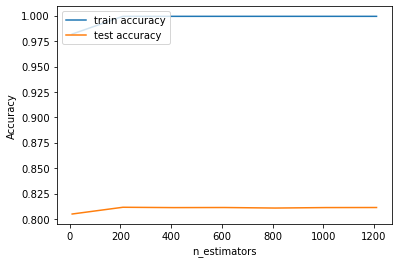

In [87]:
plt.plot(cv_results['param_n_estimators'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_estimators'], cv_results['mean_test_score'])
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')

In [88]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(max_depth=17,
                                  n_estimators=200)

model_rf.fit(X_train_transformed, y_train)

RandomForestClassifier(max_depth=17, n_estimators=200)

In [89]:
y_train_pred = model_rf.predict(X_train_transformed)

In [90]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
13630,1,1
37339,0,1
10344,1,1
2507,0,0
38396,0,0


In [91]:
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.8803120697567691
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     24457
           1       0.84      0.65      0.73      8228

    accuracy                           0.88     32685
   macro avg       0.86      0.80      0.83     32685
weighted avg       0.88      0.88      0.88     32685



In [92]:
y_test_pred = model_rf.predict(X_test_transformed)

In [93]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
31784,0,0
39875,1,0
14526,1,1
25570,0,0
11238,1,0


In [94]:
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.831206975676916
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      8260
           1       0.71      0.51      0.60      2635

    accuracy                           0.83     10895
   macro avg       0.78      0.72      0.74     10895
weighted avg       0.82      0.83      0.82     10895



### MODEL OPTIMSATION ON KNN CLASSIFIER

In [95]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
tuned_parameters = [{'n_neighbors': [i for i in range(1, 51)], 
                     'p': [1, 2, 3]}]

clf = RandomizedSearchCV(
    estimator=KNeighborsClassifier(), 
    param_distributions=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                         'p': [1, 2, 3]}],
                   return_train_score=True, scoring='accuracy', verbose=1)

In [96]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'p': 2, 'n_neighbors': 47}
KNeighborsClassifier(n_neighbors=47)

Score on Test Data:  0.8271684258834328


In [97]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors=30,p=1)
classifier1.fit(X_train_transformed, y_train)

KNeighborsClassifier(n_neighbors=30, p=1)

In [98]:
y_train_pred = classifier1.predict(X_train_transformed)

In [99]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
13630,1,1
37339,0,1
10344,1,1
2507,0,0
38396,0,0


In [100]:
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.8368976594768243
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     24457
           1       0.71      0.60      0.65      8228

    accuracy                           0.84     32685
   macro avg       0.79      0.76      0.77     32685
weighted avg       0.83      0.84      0.83     32685



In [101]:
y_test_pred = classifier1.predict(X_test_transformed)

In [102]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
31784,0,0
39875,1,1
14526,1,1
25570,0,0
11238,1,0


In [103]:
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.8273519963285911
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      8260
           1       0.67      0.56      0.61      2635

    accuracy                           0.83     10895
   macro avg       0.77      0.74      0.75     10895
weighted avg       0.82      0.83      0.82     10895



### MODEL OPTIMISATION ON DECISION TREE

In [104]:
from sklearn.tree import DecisionTreeClassifier
decisiontree1 = DecisionTreeClassifier(max_depth=9)
decisiontree1.fit(X_train_transformed, y_train)

DecisionTreeClassifier(max_depth=9)

In [105]:
y_train_pred = decisiontree1.predict(X_train_transformed)

In [106]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
13630,1,1
37339,0,1
10344,1,1
2507,0,0
38396,0,0


In [107]:
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.8379378919993881
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     24457
           1       0.71      0.59      0.65      8228

    accuracy                           0.84     32685
   macro avg       0.79      0.76      0.77     32685
weighted avg       0.83      0.84      0.83     32685



In [108]:
y_test_pred = decisiontree1.predict(X_test_transformed)

In [109]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
31784,0,0
39875,1,1
14526,1,1
25570,0,0
11238,1,0


In [110]:
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.823405231757687
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      8260
           1       0.66      0.55      0.60      2635

    accuracy                           0.82     10895
   macro avg       0.76      0.73      0.74     10895
weighted avg       0.82      0.82      0.82     10895



### MODEL OPTIMISATION ON Logstic REGRESSION

In [111]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [112]:
params = {'C':[0.0001,0.001,0.01,0.1,1.0,10,100,1000],
         'penalty':['l1','l2','elasticnet','none'],
         'solver':['lbfgs','newton-cg','liblinear','sag','saga']}

In [113]:
grid_lr = GridSearchCV(estimator=lr,cv=5,param_grid = params,n_jobs=4,scoring='accuracy',return_train_score=True,)
grid_lr.fit(X_train_transformed,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             return_train_score=True, scoring='accuracy')

In [114]:
grid_lr.best_estimator_

LogisticRegression(penalty='l1', solver='liblinear')

In [115]:
grid_lr.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [116]:
from sklearn.linear_model import LogisticRegression
logstic1 = LogisticRegression(C=10,penalty='l2',solver='liblinear')
logstic1.fit(X_train_transformed, y_train)

LogisticRegression(C=10, solver='liblinear')

In [117]:
y_train_pred = logstic1.predict(X_train_transformed)

In [118]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
13630,1,1
37339,0,1
10344,1,1
2507,0,1
38396,0,0


In [119]:
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.8280862781092244
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     24457
           1       0.70      0.56      0.62      8228

    accuracy                           0.83     32685
   macro avg       0.78      0.74      0.75     32685
weighted avg       0.82      0.83      0.82     32685



In [120]:
y_test_pred = logstic1.predict(X_test_transformed)

In [121]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
31784,0,0
39875,1,0
14526,1,1
25570,0,0
11238,1,0


In [122]:
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.8333180357962368
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      8260
           1       0.70      0.55      0.61      2635

    accuracy                           0.83     10895
   macro avg       0.78      0.74      0.75     10895
weighted avg       0.82      0.83      0.83     10895



In [123]:
best_algo={"ALgorithms":["LOGSTIC REGRESSION","KNN","DECISION TREE","RANDOM FOREST","XGBOOST","SVC","EXTRA-TREE"],"Train Accuracy":[0.8280,0.8368,0.8379,0.8803,0.8648,0.8372,0.9992],"Test Accuracy":[0.8333,0.8273,0.8234,0.8312,0.7970,0.8340,0.7970]}
best_algo

{'ALgorithms': ['LOGSTIC REGRESSION',
  'KNN',
  'DECISION TREE',
  'RANDOM FOREST',
  'XGBOOST',
  'SVC',
  'EXTRA-TREE'],
 'Train Accuracy': [0.828, 0.8368, 0.8379, 0.8803, 0.8648, 0.8372, 0.9992],
 'Test Accuracy': [0.8333, 0.8273, 0.8234, 0.8312, 0.797, 0.834, 0.797]}

In [124]:
df_1=pd.DataFrame(best_algo)
df_1

,ALgorithms,Train Accuracy,Test Accuracy
0,LOGSTIC REGRESSION,0.8280,0.8333
1,KNN,0.8368,0.8273
2,DECISION TREE,0.8379,0.8234
3,RANDOM FOREST,0.8803,0.8312
4,XGBOOST,0.8648,0.7970
5,SVC,0.8372,0.8340
6,EXTRA-TREE,0.9992,0.7970


### SVC,DECISION TREE,RANDOM FOREST and KNN are working good.